In [18]:
import pandas as pd
import geopandas as gpd
import math
from shapely.geometry import Polygon, MultiPolygon
from numpy import arange
from matplotlib import pyplot as plt

In [5]:
fortaleza = gpd.read_file('Dados/Densidade_Populacional_por_Bairros.zip')

In [6]:
def arred_baixo(num, dec):
    return math.floor(num * 10 ** dec) / 10 ** dec

In [7]:
def criar_celula(lat, lng, passo):
    return Polygon([(lat, lng), (lat + passo, lng), (lat + passo, lng + passo), (lat, lng + passo)])

In [8]:
x_min, y_min, x_max, y_max = (arred_baixo(b, 2) for b in fortaleza.geometry.unary_union.bounds)

In [9]:
p = 0.01

In [11]:
grade_completa = MultiPolygon((criar_celula(x, y, p) for x in arange(x_min - p, x_max + p, p) for y in arange(y_min - p, y_max + p, p)))   

In [12]:
grade_fortaleza = MultiPolygon([c for c in grade_completa.geoms if c.intersects(fortaleza.unary_union)])

In [19]:
fig, axs = plt.subplots(ncol=2)

gpd.GeoSeries(grade_fortaleza).boundary.plot()

AttributeError: 'Figure' object has no property 'ncol'

<AxesSubplot:>

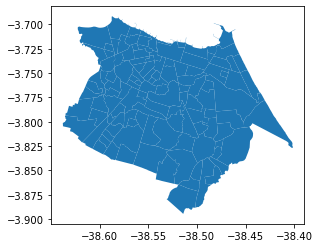

In [14]:
fortaleza.plot()